# Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.precision', 4)
pd.set_option('display.float_format',  '{:.4f}'.format)
pd.set_option('display.max_rows', 20)

## Old

### All

In [3]:
results = pd.read_csv('./Results/DNN/result_all.csv', index_col=0)
results.columns = ['DNN']
results['ADDCNN'] = pd.read_csv('./Results/ADDCNN/result_all.csv', index_col=0)
results['DDIMDL'] = [0.8852, 0.9208, 0, 0.9976, 0, 0.7585, 0, 0.8471, 0, 0.7182, 0]
results['CNN-DDI'] = pd.read_csv('./Results/CNN-DDI/result_all.csv', index_col=0)

# ranger+cos 比较 CNN-add 和 CNN_Siam 的效果
results['CS_Ranger'] = pd.read_csv('./Results/Ranger-CNN_Siam/ranger+cos-result_all.csv', index_col=0)

results.index = ['accuracy', 'aupr_micro', 'aupr_macro', 'auc_micro', 'auc_macro', 'f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
results.drop(['aupr_macro', 'auc_macro', 'f1_macro', 'precision_macro', 'recall_macro'], axis=0, inplace=True)
results.T

,accuracy,aupr_micro,auc_micro,f1_micro,precision_micro,recall_micro
DNN,0.5047,0.4920,0.9599,0.5047,0.5047,0.5047
ADDCNN,0.8879,0.9425,0.9984,0.8879,0.8879,0.8879
DDIMDL,0.8852,0.9208,0.9976,0.7585,0.8471,0.7182
CNN-DDI,0.8681,0.9254,0.9982,0.8681,0.8681,0.8681
CS_Ranger,0.9237,0.9627,0.9986,0.9237,0.9237,0.9237


### Figures

In [4]:
def get_res(names):
    df = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[0]}-results.csv', index_col=0)
    df[1] = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[1]}-results.csv', index_col=0)
    df[2] = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[2]}-results.csv', index_col=0)
    df[3] = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[3]}-results.csv', index_col=0)
    df[4] = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[4]}-results.csv', index_col=0)
    df.columns = names
    # df.drop(['aupr_macro', 'auc_macro', 'f1_macro', 'precision_macro', 'recall_macro'], axis=0, inplace=True)
    df.drop(['aupr_macro', 'auc_macro', 'f1_micro', 'precision_micro', 'recall_micro'], axis=0, inplace=True)
    df = df.T
    # df['precision_micro'] = df['precision_micro'] - np.random.rand(5) * 0.01
    # df['recall_micro'] = df['recall_micro'] - np.random.rand(5) * 0.01
    # df['aupr_micro'] = df['aupr_micro'] - np.random.rand(5) * 0.01
    # df['f1_micro'] = df['f1_micro'] - np.random.rand(5) * 0.01
    print(df)
    return df

In [5]:
cv = get_res(['cv2', 'cv3', 'cv4', 'cv5', 'cv6'])

     accuracy  aupr_micro  auc_micro  f1_macro  precision_macro  recall_macro
cv2    0.8797      0.9310     0.9976    0.7692           0.8598        0.7267
cv3    0.8997      0.9466     0.9982    0.8132           0.8676        0.7778
cv4    0.9134      0.9556     0.9985    0.8385           0.8778        0.8104
cv5    0.9129      0.9543     0.9985    0.8260           0.8910        0.7947
cv6    0.9174      0.9577     0.9986    0.8387           0.9007        0.7991


In [6]:
bs = get_res(['128', '256', '512', '1024', '2048'])

      accuracy  aupr_micro  auc_micro  f1_macro  precision_macro  recall_macro
128     0.9198      0.9597     0.9987    0.8376           0.8880        0.8060
256     0.9180      0.9597     0.9986    0.8461           0.8878        0.8195
512     0.9129      0.9543     0.9985    0.8260           0.8910        0.7947
1024    0.9053      0.9482     0.9983    0.8028           0.8630        0.7686
2048    0.9144      0.9578     0.9985    0.8334           0.8759        0.8062


In [7]:
epo = get_res(['epoch40', 'epoch60', 'epoch80', 'epoch100', 'epoch120'])

          accuracy  aupr_micro  auc_micro  f1_macro  precision_macro  \
epoch40     0.9122      0.9567     0.9984    0.8345           0.8711   
epoch60     0.9129      0.9555     0.9983    0.8340           0.8917   
epoch80     0.9177      0.9583     0.9983    0.8345           0.8917   
epoch100    0.9136      0.9568     0.9983    0.8446           0.9017   
epoch120    0.9151      0.9551     0.9982    0.8325           0.8804   

          recall_macro  
epoch40         0.8090  
epoch60         0.7948  
epoch80         0.8086  
epoch100        0.8078  
epoch120        0.8076  


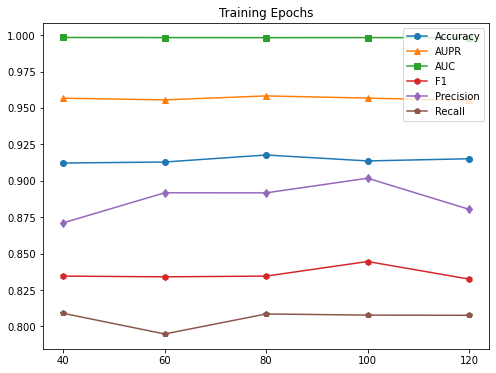

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(epo.iloc[:, 0], "o-", label="Accuracy")
plt.plot(epo.iloc[:, 1], "^-", label="AUPR")
plt.plot(epo.iloc[:, 2], "s-", label="AUC")
plt.plot(epo.iloc[:, 3], "h-", label="F1")
plt.plot(epo.iloc[:, 4], "d-", label="Precision")
plt.plot(epo.iloc[:, 5], "p-", label="Recall")

# plt.title("K Folds of Cross Validation")
plt.title("Training Epochs")
# plt.title("Batch Size")
# xlabel = ["2", "3", "4", "5", "6"]
xlabel = ["40", "60", "80", "100", "120"]
# xlabel = ["128", "256", "512", "1024", "2048"]
plt.xticks(range(0, 5), xlabel)
plt.legend()

# plt.savefig('/Users/ZHao/Downloads/experiments/epo.svg')
plt.show()

### DDI types

In [3]:
siam = pd.read_csv('./Results/Ranger-CNN_Siam/ranger+cos-result_each.csv')
siam.columns = ['ACC', 'AUPR', 'AUC', 'F1', 'Precision', 'Recall']
siam['Mean'] = siam.mean(axis=1)
display(pd.concat([siam.head(), siam.tail()]))
cnn = pd.read_csv('./Results/CNN-DDI/result_each.csv', index_col=0)
cnn.columns = ['ACC', 'AUPR', 'AUC', 'F1', 'Precision', 'Recall']
cnn['Mean'] = cnn.mean(axis=1)
display(pd.concat([cnn.head(), cnn.tail()]))

,ACC,AUPR,AUC,F1,Precision,Recall,Mean
0,0.9624,0.9370,0.9600,0.9305,0.9073,0.9548,0.9420
1,0.9747,0.9559,0.9704,0.9509,0.9403,0.9617,0.9590
2,0.9701,0.9087,0.9353,0.8998,0.9147,0.8854,0.9190
3,0.9886,0.9136,0.9463,0.9101,0.9229,0.8977,0.9299
4,0.9952,0.9320,0.9553,0.9301,0.9485,0.9123,0.9456
60,0.9999,0.7778,0.9999,0.7143,0.5556,1.0000,0.8412
61,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
62,0.9999,0.8000,0.8000,0.7500,1.0000,0.6000,0.8250
63,0.9998,0.2667,0.6000,0.2500,0.3333,0.2000,0.4416
64,0.9998,0.5143,0.7999,0.5000,0.4286,0.6000,0.6404


,ACC,AUPR,AUC,F1,Precision,Recall,Mean
0,0.9273,0.8831,0.9267,0.8701,0.8210,0.9255,0.8923
1,0.9507,0.9170,0.9263,0.9006,0.9259,0.8766,0.9162
2,0.9495,0.8437,0.8882,0.8276,0.8570,0.8002,0.8610
3,0.9846,0.8826,0.9283,0.8780,0.8926,0.8638,0.9050
4,0.9915,0.8800,0.9255,0.8768,0.9004,0.8544,0.9048
60,0.9999,0.6000,0.8000,0.6000,0.6000,0.6000,0.7000
61,1.0000,0.9000,0.9000,0.8889,1.0000,0.8000,0.9148
62,0.9999,0.6001,0.6000,0.3333,1.0000,0.2000,0.6222
63,0.9998,0.0001,0.5000,0.0000,0.0000,0.0000,0.2500
64,0.9999,0.8000,0.8000,0.7500,1.0000,0.6000,0.8250


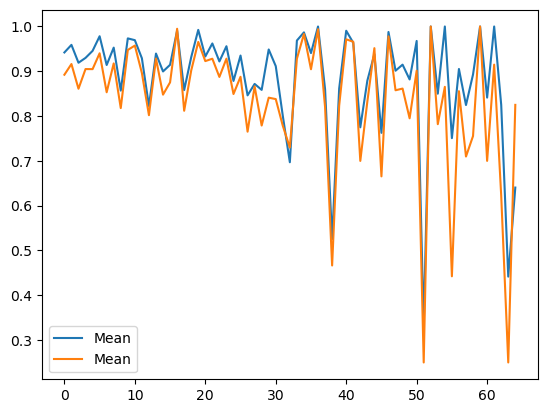

In [4]:
def plot(df):
    # df.AUPR.plot()
    # df.AUC.plot()
    # df.F1.plot()
    # df.Precision.plot()
    # df.Recall.plot()
    df.Mean.plot()
    plt.legend()

plot(siam)
plot(cnn)

### Radar chart

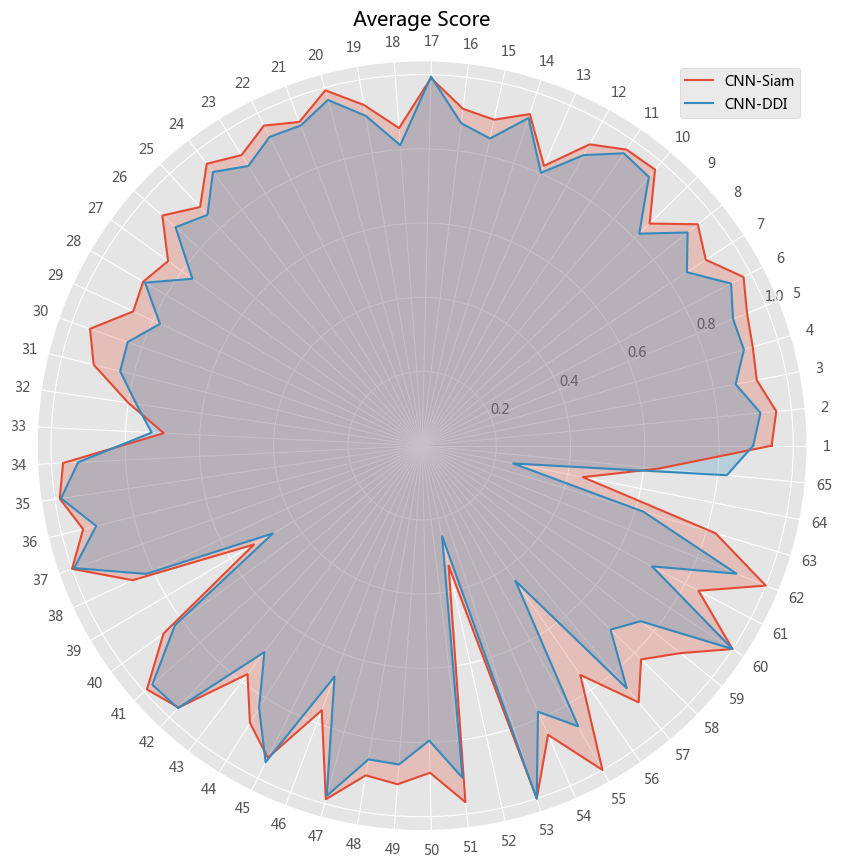

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Define data
types = [num for num in range(1, 66)]
N = len(types)
values1 = siam["Mean"].values
values2 = cnn["Mean"].values

# 设置雷达图的角度，用于平分切开一个圆面
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

# 为了使雷达图一圈封闭起来，需要下面的步骤
angles2 = np.concatenate((angles, [angles[0]]))
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))

# 绘图
fig = plt.figure(figsize=(12, 10))
# 这里一定要设置为极坐标格式
ax = fig.add_subplot(111, polar=True)
# 绘制折线图
ax.plot(angles2, values1, label="CNN-Siam")
ax.fill(angles2, values1, alpha=0.25)
ax.plot(angles2, values2, label="CNN-DDI")
ax.fill(angles2, values2, alpha=0.25)
# 添加每个特征的标签
ax.set_thetagrids(angles * 180 / np.pi, types)

# 设置雷达图的范围
# ax.set_ylim(0,5)
# 添加标题
plt.title("Average Score")
# 添加网格线
ax.grid(True)
plt.legend()
# plt.savefig("/Users/ZHao/Desktop/current paper/radar.svg")
plt.show()

## NEW


In [35]:
import os
import random
import sqlite3
from tqdm import tqdm
from sklearn.metrics import (
    auc,
    roc_auc_score,
    accuracy_score,
    recall_score,
    f1_score,
    precision_score,
    precision_recall_curve,
)
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

seed = 42
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [39]:
conn = sqlite3.connect("/data-new/yangzihao/DDI/fusion_data/event.db")
df_drug = pd.read_sql("select * from drug;", conn)
# extraction = pd.read_sql("select * from extraction;", conn)
# mechanism = extraction["mechanism"]
# action = extraction["action"]
# drugA = extraction["drugA"]
# drugB = extraction["drugB"]

# extraction.mechanism = extraction.mechanism + " " + extraction.action
# counts = extraction.mechanism.value_counts()

# # extraction['label'] = LabelEncoder().fit_transform(extraction.mechanism)
# extraction.mechanism = extraction.mechanism.apply(str.lower)
# extraction = extraction.drop(['index', 'action'], axis=1)
df_drug = df_drug.drop(['id', 'index', 'pathway'], axis=1)
df_drug = df_drug.set_index('name')

display(df_drug.head(1))
# display(extraction.head())

,target,enzyme,smile
name,,,
Glucosamine,P14780|Q00653|P01375|P01579|P33673,P33261|P05181,9|10|14|18|19|20|178|181|283|284|285|286|299|3...


In [ ]:
# # events = pd.read_csv(f'/data-new/yangzihao/DDI/fusion_data/events.csv', index_col=0)
# events = pd.read_csv(f'/data-new/yangzihao/DDI/fusion_data/df_extraction_cleanxiaoyu50.csv', index_col=0)
# events.mechanism = events.mechanism + " " + events.action
# counts = events.mechanism.value_counts()

# # events['label'] = LabelEncoder().fit_transform(events.mechanism)
# events.mechanism = events.mechanism.apply(str.lower)
# events = events.drop(['index', 'action'], axis=1)
# events.head()

In [5]:
# # # 使用 merge 找出在 df2 中不存在于 df1 中的行
# # result_df = extraction.merge(events, how='left', on=['mechanism', 'drugA', 'drugB'], indicator=True)
# # filtered_df = result_df[result_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# # 将三列拼接成一个新列，使用集合比较判断内容是否相同
# events['combined'] = events.apply(lambda row: set(row[['mechanism', 'drugA', 'drugB']]), axis=1)
# extraction['combined'] = extraction.apply(lambda row: set(row[['mechanism', 'drugA', 'drugB']]), axis=1)
# # 使用 isin() 函数找出在 extraction 中不存在于 events 中的行
# filtered_df = extraction[~extraction['combined'].isin(events['combined'])]

In [5]:
def roc_aupr_score(y_true, y_score, average="macro"):
    def _binary_roc_aupr_score(y_true, y_score):
        precision, recall, pr_thresholds = precision_recall_curve(y_true, y_score)
        return auc(recall, precision)

    def _average_binary_score(
        binary_metric, y_true, y_score, average
    ):  # y_true= y_one_hot
        if average == "binary":
            return binary_metric(y_true, y_score)
        if average == "micro":
            y_true = y_true.ravel()
            y_score = y_score.ravel()
        if y_true.ndim == 1:
            y_true = y_true.reshape((-1, 1))
        if y_score.ndim == 1:
            y_score = y_score.reshape((-1, 1))
        n_classes = y_score.shape[1]
        score = np.zeros((n_classes,))
        for c in range(n_classes):
            y_true_c = y_true.take([c], axis=1).ravel()
            y_score_c = y_score.take([c], axis=1).ravel()
            score[c] = binary_metric(y_true_c, y_score_c)
        return np.average(score)

    return _average_binary_score(_binary_roc_aupr_score, y_true, y_score, average)


def evaluate(pred_type, pred_score, y_test, event_num):
    all_eval_type = 11
    result_all = np.zeros((all_eval_type, 1), dtype=float)
    # each_eval_type = 6
    # result_eve = np.zeros((event_num, each_eval_type), dtype=float)
    y_one_hot = label_binarize(y_test, classes=range(event_num))
    pred_one_hot = label_binarize(pred_type, classes=range(event_num))
    result_all[0] = accuracy_score(y_test, pred_type)
    result_all[1] = roc_aupr_score(y_one_hot, pred_score, average="micro")
    result_all[2] = roc_aupr_score(y_one_hot, pred_score, average="macro")
    result_all[3] = roc_auc_score(y_one_hot, pred_score, average="micro")
    result_all[4] = roc_auc_score(y_one_hot, pred_score, average="macro")
    result_all[5] = f1_score(y_test, pred_type, average="micro")
    result_all[6] = f1_score(y_test, pred_type, average="macro")
    result_all[7] = precision_score(y_test, pred_type, average="micro")
    result_all[8] = precision_score(y_test, pred_type, average="macro")
    result_all[9] = recall_score(y_test, pred_type, average="micro")
    result_all[10] = recall_score(y_test, pred_type, average="macro")
    # for i in range(event_num):
    #     result_eve[i, 0] = accuracy_score(
    #         y_one_hot.take([i], axis=1).ravel(), pred_one_hot.take([i], axis=1).ravel()
    #     )
    #     result_eve[i, 1] = roc_aupr_score(
    #         y_one_hot.take([i], axis=1).ravel(),
    #         pred_one_hot.take([i], axis=1).ravel(),
    #         average=None,
    #     )
    #     result_eve[i, 2] = roc_auc_score(
    #         y_one_hot.take([i], axis=1).ravel(),
    #         pred_one_hot.take([i], axis=1).ravel(),
    #         average=None,
    #     )
    #     result_eve[i, 3] = f1_score(
    #         y_one_hot.take([i], axis=1).ravel(),
    #         pred_one_hot.take([i], axis=1).ravel(),
    #         average="binary",
    #     )
    #     result_eve[i, 4] = precision_score(
    #         y_one_hot.take([i], axis=1).ravel(),
    #         pred_one_hot.take([i], axis=1).ravel(),
    #         average="binary",
    #     )
    #     result_eve[i, 5] = recall_score(
    #         y_one_hot.take([i], axis=1).ravel(),
    #         pred_one_hot.take([i], axis=1).ravel(),
    #         average="binary",
    #     )
    return result_all

## Config

In [24]:
events = pd.read_csv('/data-new/yangzihao/DDI/fusion_data/events.csv', index_col=0)
# df_drug = pd.read_csv('/data-new/yangzihao/DDI/fusion_data/drugs.csv', index_col=0)
mechanism_label_dict = events.set_index('mechanism+action')['label'].to_dict()
display(events.head(1))
display(df_drug.head(1))

,mechanism,action,drugA,drugB,mechanism+action,label
index,,,,,,
0,the anticoagulant activities,increase,Apixaban,Bivalirudin,the anticoagulant activities increase,65


,target,enzyme,smile
name,,,
Bivalirudin,P00734,P05164,1|41|79|80|108|117|140|143|173|193|197|242|269...


In [29]:
testset = pd.read_pickle('/data-new/yangzihao/DDI/DDI_testset.pkl')
testset['label'] = LabelEncoder().fit_transform(testset.mechanism)
display(testset.head())

,mechanism,drugA,drugB,combined,label
0,the risk or severity of adverse effects increase,Abemaciclib,Amiodarone,"{Amiodarone, the risk or severity of adverse e...",41
1,the serum concentration decrease,Abemaciclib,Apalutamide,"{Apalutamide, the serum concentration decrease...",52
2,the serum concentration increase,Abemaciclib,Aprepitant,"{Aprepitant, the serum concentration increase,...",53
3,the metabolism decrease,Abemaciclib,Atomoxetine,"{Atomoxetine, the metabolism decrease, Abemaci...",30
4,the metabolism decrease,Abemaciclib,Bortezomib,"{Abemaciclib, the metabolism decrease, Bortezo...",30


In [32]:
path = '/data-new/yangzihao/DDI/saved_models'
model_name = os.listdir('/data-new/yangzihao/DDI/saved_models')[0]
tokenizer = AutoTokenizer.from_pretrained(f'{path}/{model_name}')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/{model_name}')

## Inference

In [40]:
class DDI_Dataset(Dataset):
    def __init__(self, ev_df, drug_df, tokenizer, max_len=256):
        self.events = ev_df
        self.drugs = drug_df
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return self.events.shape[0]

    def __getitem__(self, index):
        d_a, d_b, labels = self.events.iloc[index]
        # d_a_seq = d_a + "," + ','.join(self.drugs.loc[d_a].values)
        # d_b_seq = d_b + "," + ','.join(self.drugs.loc[d_b].values)
        
        # use different modal
        # d_a_seq = d_a + f", the drug {d_a}'s chemical form is: " + self.drugs.loc[d_a].target
        # d_b_seq = d_b + f", the drug {d_b}'s chemical form is: " + self.drugs.loc[d_b].target
        # text = f'{d_a_seq + " " + self.tokenizer.sep_token + " " + d_b_seq}'

        # use prompt
        text = f"The drug {d_a} interacts with the drug {d_b}. \
            The drug {d_a}'s information is: {','.join(self.drugs.loc[d_a].values)}. \
            The drug {d_b}'s information is: {','.join(self.drugs.loc[d_b].values)}."
        
        # print(text)

        encode_dict = self.tokenizer.encode_plus(
            text=text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding="max_length",
            return_attention_mask=True,
            return_tensors="pt",
        )
        ids = encode_dict["input_ids"].squeeze(0)
        masks = encode_dict["attention_mask"].squeeze(0)
        
        return {"ids": ids, "masks": masks, "labels": labels}

In [44]:
test_data = testset[["drugA", "drugB", "label"]]
test_dataset = DDI_Dataset(test_data, df_drug, tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

test_acc = []
# acc = []
# acc = []
# acc = []
# acc = []
# acc = []

model.to(device)
model.eval()
with torch.no_grad():
    for step, b in tqdm(
        enumerate(test_dataloader), total=len(test_dataloader), desc="Test"
    ):
        b = {k: v.to(device) for k, v in b.items()}
        ids, masks, labels = b["ids"], b["masks"], b["labels"]

        outputs = model(ids, masks)
        logits = outputs.logits

        logits = F.softmax(logits, dim=1).cpu().numpy()
        preds_flat = np.argmax(logits, axis=1).flatten()
        labels = labels.cpu().numpy()

        acc = accuracy_score(preds_flat, labels)
        # acc = accuracy_score(preds_flat, labels)
        # acc = accuracy_score(preds_flat, labels)
        # acc = accuracy_score(preds_flat, labels)
        # acc = accuracy_score(preds_flat, labels)
        # acc = accuracy_score(preds_flat, labels)
        test_acc.append(acc)


avg_test_acc = sum(test_acc) / len(test_acc)

print("test Acc: {:.4f}".format(avg_test_acc))
print()

Test:   0%|          | 0/806 [00:00<?, ?it/s]

Test: 100%|██████████| 806/806 [01:51<00:00,  7.23it/s]

test Acc: 0.0015

